In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
rawdata_loc = "D:\Data & Projects\Customer Acquisition Model\customer_acq_model\data\\01_raw"
reporting_loc = "D:\Data & Projects\Customer Acquisition Model\customer_acq_model\data\\03_reporting"
intermediate_loc = "D:\Data & Projects\Customer Acquisition Model\customer_acq_model\data\\02_intermediate"

In [3]:
# pulling raw media - sales - customer demography - cost of acq customers
data = pd.read_csv(f"{rawdata_loc}\\media_costs_data.csv")
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [4]:
# Revenue generated / food category 
def revenue_generated(data):
    
    revenuetable = data.groupby('food_category').agg(Revenue = pd.NamedAgg('store_sales(in millions)','sum'),
                                                    Cost = pd.NamedAgg('store_cost(in millions)','sum'),
                                                    Demand = pd.NamedAgg('unit_sales(in millions)','sum'))
    revenuetable = revenuetable.sort_values(by = 'Revenue',ascending = False)
    revenuetable['roi'] = revenuetable.Revenue/revenuetable.Cost
    
    return revenuetable

revenuetable_FC = revenue_generated(data = data)
revenuetable_FC

,Revenue,Cost,Demand,roi
food_category,,,,
Vegetables,50067.64,20059.2579,23041.0,2.495987
Snack Foods,47726.96,19115.3878,21491.0,2.496782
Dairy,25705.33,10335.8544,11825.0,2.487006
Meat,21206.17,8470.7505,9622.0,2.503458
Fruit,20134.93,8063.4484,9529.0,2.497062
Jams and Jellies,15400.78,6132.6088,7831.0,2.511293
Bread,11813.05,4728.0011,5552.0,2.498529
Breakfast Foods,11328.06,4535.8428,6025.0,2.497454
Baking Goods,11313.59,4523.1481,6037.0,2.501265


In [5]:
revenuetable_FC.nlargest(10,'Revenue')

,Revenue,Cost,Demand,roi
food_category,,,,
Vegetables,50067.64,20059.2579,23041.0,2.495987
Snack Foods,47726.96,19115.3878,21491.0,2.496782
Dairy,25705.33,10335.8544,11825.0,2.487006
Meat,21206.17,8470.7505,9622.0,2.503458
Fruit,20134.93,8063.4484,9529.0,2.497062
Jams and Jellies,15400.78,6132.6088,7831.0,2.511293
Bread,11813.05,4728.0011,5552.0,2.498529
Breakfast Foods,11328.06,4535.8428,6025.0,2.497454
Baking Goods,11313.59,4523.1481,6037.0,2.501265


In [6]:
revenuetable_FC.nlargest(10,'roi')

,Revenue,Cost,Demand,roi
food_category,,,,
Canned Clams,1274.46,497.0866,630.0,2.563859
Plastic Products,4622.67,1825.9742,1808.0,2.531618
Carbonated Beverages,4467.83,1773.1219,2427.0,2.519753
Canned Sardines,868.28,345.6828,534.0,2.511782
Jams and Jellies,15400.78,6132.6088,7831.0,2.511293
Seafood,2470.42,984.0403,1164.0,2.510487
Canned Tuna,2320.84,925.1180,1207.0,2.508696
Frozen Entrees,4183.06,1669.8595,1857.0,2.505037
Starchy Foods,7790.06,3110.1617,3433.0,2.504712


Observation:
    From the Revenue Table of Food Category above it is clear that the top 10 revenue generators of the Business might not be the top 10 ROI generators for the Business. There could be a case where this observation could be due to the customer demands in the area or demegraphy.

In [7]:
# Exploring the Cost Vs Revenue of the inverted pyramidal structure of the Food Category - Department - Family
def revenue_generated(data,col_name):
    
    revenuetable = data.groupby(col_name).agg(Revenue = pd.NamedAgg('store_sales(in millions)','sum'),
                                              Cost = pd.NamedAgg('store_cost(in millions)','sum'),
                                              Demand = pd.NamedAgg('unit_sales(in millions)','sum'))
    revenuetable = revenuetable.sort_values(by = 'Revenue',ascending = False)
    revenuetable['roi'] = revenuetable.Revenue/revenuetable.Cost
    
    return revenuetable

In [8]:
# CHAT GPT Auto-documented code
import pandas as pd

# Exploring the Cost Vs Revenue of the inverted pyramidal structure of the Food Category - Department - Family
def revenue_generated(data, col_name):
    """
    Provides a detailed breakdown of revenue, cost, demand, and ROI for a specified column from the Retail Food business.

    This function groups the input DataFrame by the specified column (e.g., 'Food Category', 'Department', or 'Family') 
    and calculates the total revenue, cost, and demand. It also computes the return on investment (ROI) as the ratio 
    of revenue to cost, and returns a table with the results sorted by revenue in descending order.

    Parameters:
    ----------
    data : pd.DataFrame
        The input DataFrame containing the retail food business data. It should include the columns 
        'store_sales(in millions)', 'store_cost(in millions)', and 'unit_sales(in millions)'.
        
    col_name : str
        The column name by which the data should be grouped (e.g., 'Food Category', 'Department', or 'Family').

    Returns:
    -------
    pd.DataFrame
        A DataFrame with the aggregated results including revenue, cost, demand, and ROI, sorted by revenue.

    Example:
    --------
    >>> revenue_generated(df, 'Department')
    """

    revenuetable = data.groupby(col_name).agg(
        Revenue=pd.NamedAgg('store_sales(in millions)', 'sum'),
        Cost=pd.NamedAgg('store_cost(in millions)', 'sum'),
        Demand=pd.NamedAgg('unit_sales(in millions)', 'sum')
    )
    
    # Sort the resulting DataFrame by revenue in descending order
    revenuetable = revenuetable.sort_values(by='Revenue', ascending=False)
    
    # Calculate Return on Investment (ROI) as Revenue / Cost
    revenuetable['roi'] = revenuetable.Revenue / revenuetable.Cost
    
    return revenuetable


In [9]:
# food category:
revenue_generated(data = data, col_name = 'food_category')

,Revenue,Cost,Demand,roi
food_category,,,,
Vegetables,50067.64,20059.2579,23041.0,2.495987
Snack Foods,47726.96,19115.3878,21491.0,2.496782
Dairy,25705.33,10335.8544,11825.0,2.487006
Meat,21206.17,8470.7505,9622.0,2.503458
Fruit,20134.93,8063.4484,9529.0,2.497062
Jams and Jellies,15400.78,6132.6088,7831.0,2.511293
Bread,11813.05,4728.0011,5552.0,2.498529
Breakfast Foods,11328.06,4535.8428,6025.0,2.497454
Baking Goods,11313.59,4523.1481,6037.0,2.501265


In [10]:
# food department:
revenue_generated(data = data, col_name = 'food_department')

,Revenue,Cost,Demand,roi
food_department,,,,
Produce,56914.58,22787.2701,26361.0,2.497648
Snack Foods,47726.96,19115.3878,21491.0,2.496782
Household,42579.56,17043.4544,19089.0,2.498294
Frozen Foods,39055.11,15647.3022,18909.0,2.495964
Canned Foods,27085.84,10876.5089,13079.0,2.490306
Baking Goods,26714.37,10655.7569,13868.0,2.507036
Dairy,25705.33,10335.8544,11825.0,2.487006
Health and Hygiene,23860.63,9577.4205,11767.0,2.491342
Beverages,19003.40,7591.0691,9324.0,2.503389


In [11]:
# Revenue - Demand across all 3 lines of food family
revenueline = data.groupby(['food_family','food_category','food_department']).agg(Revenue = pd.NamedAgg('store_sales(in millions)','sum'),
                                          Cost = pd.NamedAgg('store_cost(in millions)','sum'),
                                          Demand = pd.NamedAgg('unit_sales(in millions)','sum'))
revenueline = revenueline.sort_values(by = 'Revenue',ascending = False)
revenueline['roi'] = revenueline.Revenue/revenueline.Cost
revenueline

Revenue        Cost  \
food_family    food_category        food_department                             
Food           Snack Foods          Snack Foods          47726.96  19115.3878   
               Vegetables           Produce              31777.87  12722.8269   
               Dairy                Dairy                20626.94   8307.3254   
               Fruit                Produce              17863.05   7146.6596   
               Jams and Jellies     Baking Goods         15400.78   6132.6088   
               Meat                 Deli                 14710.30   5865.9227   
               Bread                Baked Goods          11813.05   4728.0011   
               Baking Goods         Baking Goods         11313.59   4523.1481   
Non-Consumable Electrical           Household            11147.72   4477.1918   
               Paper Products       Household            10767.78   4304.3053   
Food           Canned Soup          Canned Foods         10419.14   4190.5216   
               Vegetables           Frozen Foods         10365.33   4155.1374   
               Candy                Snacks               10141.97   4056.9256   
Drink          Beer and Wine        Alcoholic Beverages  10096.61   4048.5488   
Food           Frozen Desserts      Frozen Foods          9329.26   3735.1895   
Non-Consumable Bathroom Products    Health and Hygiene    8549.83   3423.6980   
Food           Vegetables           Canned Foods          7924.44   3181.2936   
               Starchy Foods        Starchy Foods         7790.06   3110.1617   
Non-Consumable Kitchen Products     Household             6823.04   2728.9778   
               Pain Relievers       Health and Hygiene    6511.23   2621.3690   
Food           Eggs                 Eggs                  6398.62   2558.0635   
               Breakfast Foods      Frozen Foods          6278.50   2510.8892   
Non-Consumable Magazines            Periodicals           6207.53   2490.2450   
Food           Specialty            Produce               6093.29   2443.0965   
Drink          Hot Beverages        Beverages             5856.23   2342.0334   
               Dairy                Dairy                 5078.39   2028.5290   
Food           Breakfast Foods      Breakfast Foods       5049.56   2024.9536   
               Pizza                Frozen Foods          4889.95   1955.7461   
Non-Consumable Cleaning Supplies    Household             4729.24   1907.0914   
               Plastic Products     Household             4622.67   1825.9742   
Drink          Carbonated Beverages Beverages             4467.83   1773.1219   
               Pure Juice Beverages Beverages             4458.40   1783.0764   
Non-Consumable Hygiene              Health and Hygiene    4445.85   1784.4037   
Drink          Drinks               Beverages             4220.94   1692.8374   
Food           Frozen Entrees       Frozen Foods          4183.06   1669.8595   
               Meat                 Frozen Foods          4009.01   1620.4805   
               Side Dishes          Deli                  3358.02   1351.5997   
Non-Consumable Hardware             Household             2649.06   1059.2678   
Food           Meat                 Meat                  2486.86    984.3473   
               Seafood              Seafood               2470.42    984.0403   
               Canned Tuna          Canned Foods          2320.84    925.1180   
               Fruit                Canned Products       2271.88    916.7888   
Non-Consumable Cold Remedies        Health and Hygiene    2184.32    880.3907   
               Decongestants        Health and Hygiene    2169.40    867.5591   
Food           Canned Anchovies     Canned Foods          1664.65    672.6467   
               Canned Shrimp        Canned Foods          1448.43    598.6557   
Non-Consumable Specialty            Carousel              1300.86    523.1877   
Food           Canned Clams         Canned Foods          1274.46    497.0866   
Non-Cons

## Correlation Study:
We need to understand & investigate the linear trends and associations between all the numeric covariates & our response variable

In [12]:
# Code to create a list of variables from the above dataframe that contains numeric entries.
num_cols = data.select_dtypes(include=['number']).columns.tolist()
# Code to calculate the correlation matrix out of the list of numeric vectors in the dataframe
abs_corr_mat = data[num_cols].corr().abs()
# Transform the absolute correlation matrix above to a table which compares the correlation of the response variable with all other variables in a longer format.
response_var = 'cost'
corr_table = (
    abs_corr_mat[[response_var]]
    .drop(response_var)  # Exclude correlation of response with itself
    .reset_index()  # Reset index to make it tidy
    .rename(columns={'index': 'Variable', response_var: 'Correlation'})  # Rename for clarity
)
corr_table.sort_values('Correlation',ascending=False)

,Variable,Correlation
18,video_store,0.111214
20,prepared_food,0.095596
19,salad_bar,0.095596
21,florist,0.087340
17,coffee_bar,0.060859
15,frozen_sqft,0.047971
16,meat_sqft,0.047962
13,store_sqft,0.039656
14,grocery_sqft,0.025108
2,unit_sales(in millions),0.015015


# Inference : Correlation Study 
Based on the above long form correlation table with our response variable "cost". 
It is clear to us that the linear association between them is close to 0. Hence, we should 
explore non-linear techniques for predicting the cost of Accq Customers.

# Variance Study of Cost of Aqq Cust X Promotion Name
We want to understand and viz the spread of the cost over the different promotion name.

In [13]:
data.promotion_name.nunique() # This gives us the number of unique promotion names

49

In [19]:
promo_dist = data.groupby(['promotion_name']).agg(mean = pd.NamedAgg('cost','mean'),
                                                  median = pd.NamedAgg('cost','median'),
                                               var = pd.NamedAgg('cost','var'),
                                               obs = pd.NamedAgg('cost','count'),
                                               Min = pd.NamedAgg('cost','min'),
                                               Max = pd.NamedAgg('cost','max')).reset_index().sort_values('var',ascending= False)
promo_dist

,promotion_name,mean,median,var,obs,Min,Max
14,Free For All,105.877051,126.24,1475.950566,1621,52.06,148.87
23,Pick Your Savings,101.718813,83.51,1453.853144,876,56.49,147.17
7,Coupon Spectacular,97.340647,90.58,1315.935880,402,51.47,145.31
39,Super Savers,114.039731,137.55,1215.978606,1930,64.76,144.54
4,Big Time Savings,106.383007,129.38,1209.183257,745,53.45,135.80
5,Bye Bye Baby,103.677071,90.58,1195.681204,874,58.16,141.39
25,Price Destroyers,111.700997,121.44,1145.925220,1374,58.27,148.62
32,Sales Galore,121.205833,142.45,1013.799405,1212,62.40,149.08
11,Double Down Sale,80.373311,62.67,941.363550,1755,50.79,142.71
42,Tip Top Savings,96.935835,79.59,938.203675,862,54.90,142.58


Now, let us extract the promotional names based on the variance of the cost of aqq the customers,
if the variance of the cost under a promotional name is higher than the other then this 
implies that the respective promotion had varying cost for aqq the customers. 
Hence, let us extract the promotion names that has var higher than the median.

In [15]:
promo_dist['var'].median()

613.9548388299912

In [16]:
filtered_promos = promo_dist[promo_dist['var'] >= promo_dist['var'].median()].promotion_name.tolist()
filtered_promos

['Free For All',
 'Pick Your Savings',
 'Coupon Spectacular',
 'Super Savers',
 'Big Time Savings',
 'Bye Bye Baby',
 'Price Destroyers',
 'Sales Galore',
 'Double Down Sale',
 'Tip Top Savings',
 'Weekend Markdown',
 'Big Time Discounts',
 'Best Savings',
 'Mystery Sale',
 'Big Promo',
 'One Day Sale',
 'Unbeatable Price Savers',
 'Green Light Days',
 'Save-It Sale',
 'Super Duper Savers',
 'Savings Galore',
 'Price Cutters',
 'You Save Days',
 'Cash Register Lottery',
 'Bag Stuffers']

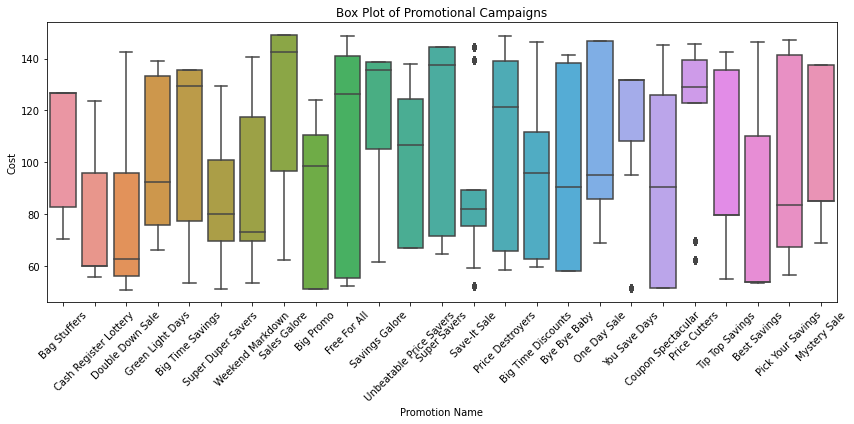

In [18]:
# Filter the original dataset to include only the filtered promotions
filtered_data = data[data['promotion_name'].isin(filtered_promos)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='promotion_name', y='cost', data=filtered_data)
plt.title('Box Plot of Promotional Campaigns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Promotion Name')
plt.ylabel('Cost')
plt.tight_layout()

# Show the plot
plt.show()

Inference:
From the above boxplot(s) it is obvious that the variance offered by these promotional campaigns are 
higher compard to the other ones and if we trace the localization of the medians of these campaigns then it becomes clear that there are some campaigns that had a lot higher cost of aqq customers compared to the other campagins. This insight will enables us to understand that these campaigns can offer a good signal to our ML model if they can be transformed as features and expand our feature space

In [25]:
filteredpromos = pd.DataFrame({"promo_campaigns": filtered_promos}) 
filteredpromos.to_csv(f"{intermediate_loc}//promotions_shortlisted.csv",index = False)

# Demographic Analysis
Let us try to understand the influence of customer demography over the cost of aqq customers. 

In [26]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [29]:
# to check if the 2 columns for average cars at home are identical or not without statistical measures 
sum(data['avg_cars_at home(approx)'] == data['avg_cars_at home(approx).1']) == data.shape[0]

True

In [30]:
#list of demographic columns:
#this list of features contains features that add to the customer demography and their experience shopping
custdemo = ['marital_status', 'gender', 'total_children', 'education','member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home','store_type','store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food','media_type']

In [31]:
#extract customer data using the list above
custdata = data[custdemo]
custdata.head(5)

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,store_type,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,media_type
0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Deluxe Supermarket,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio"
1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Deluxe Supermarket,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio"
2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Deluxe Supermarket,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio"
3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Deluxe Supermarket,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,In-Store Coupon
4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Deluxe Supermarket,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,Radio


In [32]:
custdata.dtypes

marital_status               object
gender                       object
total_children              float64
education                    object
member_card                  object
occupation                   object
houseowner                   object
avg_cars_at home(approx)    float64
avg. yearly_income           object
num_children_at_home        float64
store_type                   object
store_sqft                  float64
grocery_sqft                float64
frozen_sqft                 float64
meat_sqft                   float64
coffee_bar                  float64
video_store                 float64
salad_bar                   float64
prepared_food               float64
media_type                   object
dtype: object

# Creating Customer Level Personas based on Customer Demography & Customer Experience

As we do not have any customer level ID attached to the data it would be wise to gather similar customers 
under one umbrella and create personas out of them. Then using the persona tags we can insert them as 
the type of customers in the data for further predictions.

R&D :: Clustering - kprototype